In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [101]:
df= pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2018,42.540001,43.075001,42.314999,43.064999,40.776531,102223600
1,03-01-2018,43.132500,43.637501,42.990002,43.057499,40.769424,118071600
2,04-01-2018,43.134998,43.367500,43.020000,43.257500,40.958790,89738400
3,05-01-2018,43.360001,43.842499,43.262501,43.750000,41.425121,94640000
4,06-01-2018,43.587502,43.902500,43.482498,43.587502,41.271259,82271200


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1382 non-null   object 
 1   Open       1382 non-null   float64
 2   High       1382 non-null   float64
 3   Low        1382 non-null   float64
 4   Close      1382 non-null   float64
 5   Adj Close  1382 non-null   float64
 6   Volume     1382 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 75.7+ KB


In [103]:
df["Date"]=pd.to_datetime(df["Date"],format = '%d-%m-%Y')

In [104]:
df.shape

(1382, 7)

In [105]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.776531,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769424,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958790,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425121,94640000
4,2018-01-06,43.587502,43.902500,43.482498,43.587502,41.271259,82271200
...,...,...,...,...,...,...,...
1377,2021-10-10,185.550003,187.559998,185.009995,186.679993,186.428238,53079300
1378,2021-10-11,186.830002,188.050003,185.229996,185.270004,185.020157,48088700
1379,2021-10-12,185.889999,188.389999,185.669998,188.059998,187.806381,50730800
1380,2021-10-13,187.929993,189.899994,187.600006,189.250000,188.994781,51216800


In [106]:
df.set_index("Date",inplace=True)

In [107]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.776531,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769424,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958790,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425121,94640000
2018-01-06,43.587502,43.902500,43.482498,43.587502,41.271259,82271200


# Moving Average Method

In [108]:
df["rolling:5days_high"]=df["High"].rolling(window=5).mean()

In [109]:
df["rolling:10days_high"]=df["High"].rolling(window=10).mean()

In [113]:
df_aug=df["2020-08-01":"2020-12-30"]

<Axes: xlabel='Date'>

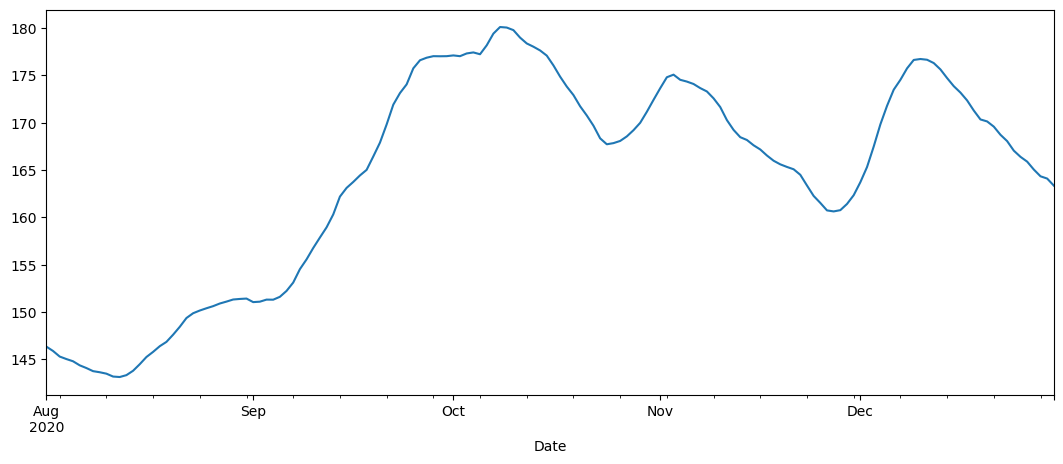

In [118]:
df_aug["rolling:10days_high"].plot(figsize=(13,5))

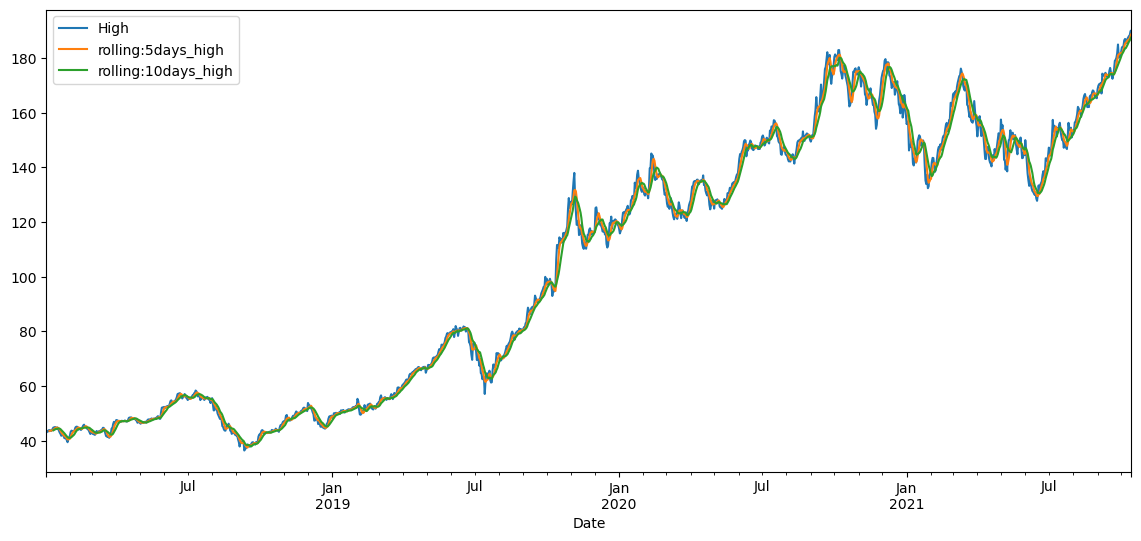

In [110]:
df[["High","rolling:5days_high","rolling:10days_high"]].plot(figsize=(14,6))
plt.show()

In [47]:
df1=df["2020-01-01":"2021-12-30"]

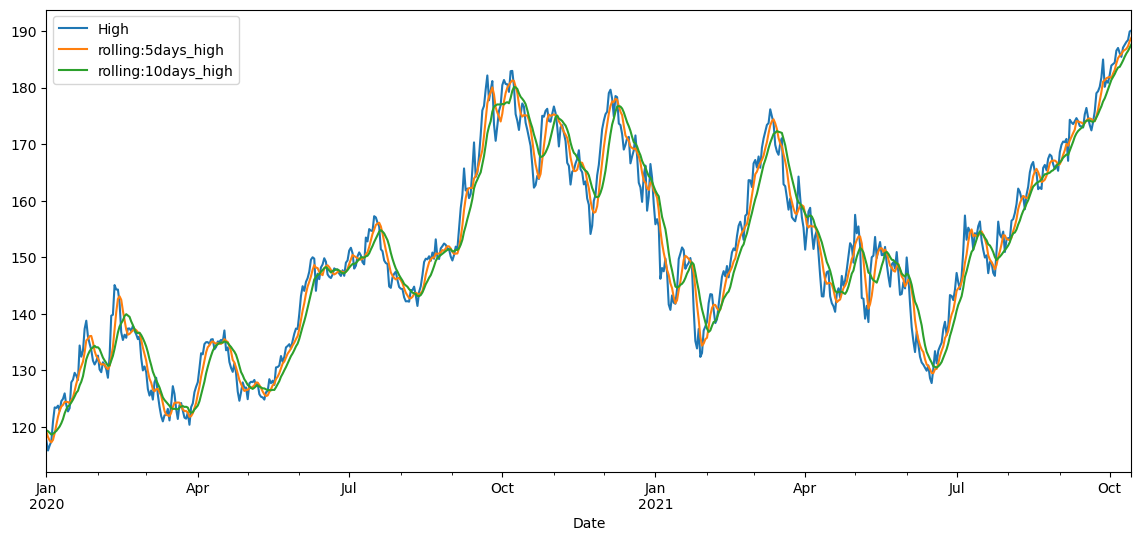

In [49]:
df1[["High","rolling:5days_high","rolling:10days_high"]].plot(figsize=(14,6))
plt.show()

# simple exponential smoothing

In [119]:
df2=df1["High"]

In [82]:
df2

Date
2020-01-01    117.620003
2020-01-02    115.849998
2020-01-03    116.750000
2020-01-04    117.489998
2020-01-05    120.970001
                 ...    
2021-10-10    187.559998
2021-10-11    188.050003
2021-10-12    188.389999
2021-10-13    189.899994
2021-10-14    190.070007
Name: High, Length: 653, dtype: float64

In [120]:
fit1=SimpleExpSmoothing(df2).fit(smoothing_level=.2)

C:\Users\teach\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [121]:
fit1.fittedvalues

Date
2020-01-01    119.737566
2020-01-02    119.314054
2020-01-03    118.621243
2020-01-04    118.246994
2020-01-05    118.095595
                 ...    
2021-10-10    185.045906
2021-10-11    185.548724
2021-10-12    186.048980
2021-10-13    186.517184
2021-10-14    187.193746
Length: 653, dtype: float64

In [122]:
fit2=SimpleExpSmoothing(df2).fit(smoothing_level=.8,optimized=False)

C:\Users\teach\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [123]:
df2=pd.DataFrame(df2)

In [124]:
df2

,High
Date,
2020-01-01,117.620003
2020-01-02,115.849998
2020-01-03,116.750000
2020-01-04,117.489998
2020-01-05,120.970001
...,...
2021-10-10,187.559998
2021-10-11,188.050003
2021-10-12,188.389999


In [125]:
df2["exponential_.2"]=fit1.fittedvalues.values

In [126]:
df2["exponential_.8"]=fit2.fittedvalues.values

In [129]:
df3=df2["2020-01-01":"2021-12-30"]

In [ ]:
df1["rolling:10days_high"]

In [132]:
df4=pd.concat([df3,df1["rolling:10days_high"]],axis=1)

<Axes: xlabel='Date'>

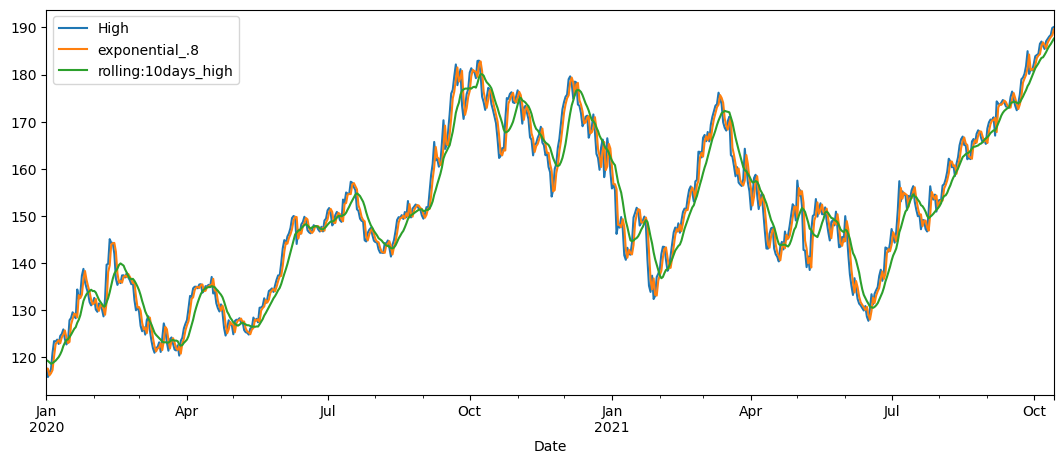

In [134]:
df4[['High', 'exponential_.8',"rolling:10days_high"]].plot(figsize=(13,5))

# Holt Method

In [136]:
df3=df1["High"]

In [137]:
df3

Date
2020-01-01    117.620003
2020-01-02    115.849998
2020-01-03    116.750000
2020-01-04    117.489998
2020-01-05    120.970001
                 ...    
2021-10-10    187.559998
2021-10-11    188.050003
2021-10-12    188.389999
2021-10-13    189.899994
2021-10-14    190.070007
Name: High, Length: 653, dtype: float64

In [138]:
linear_trend_holt=Holt(df3).fit()

C:\Users\teach\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [139]:
linear_trend_holt.fittedvalues

Date
2020-01-01    117.619922
2020-01-02    117.731123
2020-01-03    115.961114
2020-01-04    116.861117
2020-01-05    117.601116
                 ...    
2021-10-10    187.161116
2021-10-11    187.671112
2021-10-12    188.161118
2021-10-13    188.501115
2021-10-14    190.011113
Length: 653, dtype: float64

In [140]:
exp_trend_holt=Holt(df3,exponential=True).fit()

C:\Users\teach\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [141]:
exp_trend_holt.fittedvalues

Date
2020-01-01    117.620001
2020-01-02    117.692417
2020-01-03    115.921323
2020-01-04    116.821879
2020-01-05    117.562332
                 ...    
2021-10-10    187.165163
2021-10-11    187.675472
2021-10-12    188.165779
2021-10-13    188.505984
2021-10-14    190.016909
Length: 653, dtype: float64

In [143]:
df3=pd.DataFrame(df3)

In [144]:
df3["linear_trendvalues"]=linear_trend_holt.fittedvalues

In [145]:
df3

,High,linear_trendvalues
Date,,
2020-01-01,117.620003,117.619922
2020-01-02,115.849998,117.731123
2020-01-03,116.750000,115.961114
2020-01-04,117.489998,116.861117
2020-01-05,120.970001,117.601116
...,...,...
2021-10-10,187.559998,187.161116
2021-10-11,188.050003,187.671112
2021-10-12,188.389999,188.161118


In [146]:
df3["exp_trendvalues"]=exp_trend_holt.fittedvalues

In [147]:
df3

,High,linear_trendvalues,exp_trendvalues
Date,,,
2020-01-01,117.620003,117.619922,117.620001
2020-01-02,115.849998,117.731123,117.692417
2020-01-03,116.750000,115.961114,115.921323
2020-01-04,117.489998,116.861117,116.821879
2020-01-05,120.970001,117.601116,117.562332
...,...,...,...
2021-10-10,187.559998,187.161116,187.165163
2021-10-11,188.050003,187.671112,187.675472
2021-10-12,188.389999,188.161118,188.165779
